In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Prepare data

In [7]:
df_lab_rbc = pd.read_csv('data/DatasetEV2.csv')
df_lit_rbc = pd.read_csv('data/DatasetEV1.csv')

representative_rows_lab_rbc = df_lab_rbc[df_lab_rbc['100% representative'] == 1]
active_rows_lab_rbc = df_lab_rbc[(df_lab_rbc['100% representative'] == 1) & (df_lab_rbc['Rate mean [s-1]'] >= 0)]
representative_rows_lab_rbc.loc[:,'Rate mean [s-1]'] = representative_rows_lab_rbc.loc[:,'Rate mean [s-1]'].astype(float)
df_lit_rbc['kcat,c  [s-1]'] = df_lit_rbc['kcat,c  [s-1]'].astype(float)

Plot

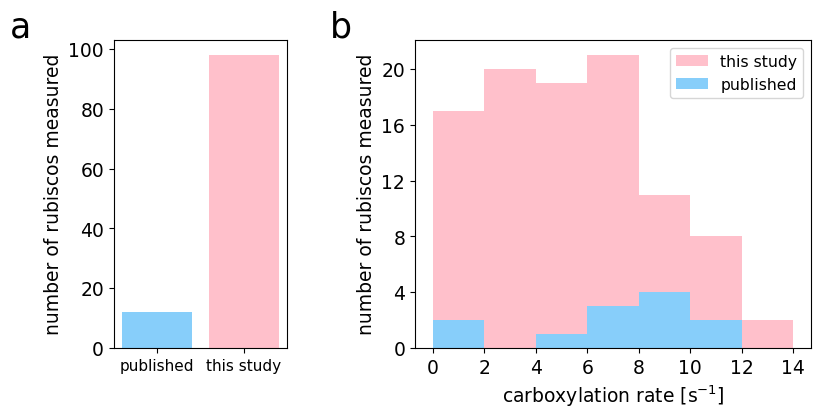

In [8]:
BINS = np.arange(0, 15, 2)
plt.style.use('default')
plt.rc('font', size=13.5)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), gridspec_kw={'width_ratios': (0.48, 1.1)})
fig.subplots_adjust(wspace=0.45)

# Bar plot on ax1
lit_rbc_counts = df_lit_rbc.shape[0]
ax1.bar(['previously\nreported'], [lit_rbc_counts], color='lightskyblue')
lab_rbc_active_counts = active_rows_lab_rbc.shape[0]
ax1.bar(['newly\nreported'], [lab_rbc_active_counts], color='pink')
ax1.set_ylabel('number of rubiscos measured')
ax1.text(-.6, 1.1, 'a', transform=ax1.transAxes, fontsize=25, va='top')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['published', 'this study'], fontsize=11)

# Histogram on ax2
ax2.hist(representative_rows_lab_rbc['Rate mean [s-1]'], bins=BINS, color='pink', alpha=1, label='this study')
ax2.hist(df_lit_rbc['kcat,c  [s-1]'], bins=BINS, color='lightskyblue', alpha=1, label='published')
ax2.set_xlabel('carboxylation rate [s$^{-1}$]')
ax2.set_ylabel('number of rubiscos measured')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax2.legend()
ax2.text(1.25, 1.1, 'b', transform=ax1.transAxes, fontsize=25, va='top')
ax2.legend(fontsize='small')

plt.savefig(r'plots/all_rates.png', dpi=300, bbox_inches='tight')
plt.show()
